In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import lightgbm as lgb

## Data Cleaning and Preprocessing

In [2]:
df = pd.read_csv('travel_risk.csv')
df.head()

,State,Crime Rate,Health Facilities,Police Presence,Hospital Access,Road Condition,Recent Incidents,Risk Level
0,Kebbi,2824.0,302.0,3.0,2,2,4.0,Low
1,Lagos,2679.0,2971.0,5.0,5,1,13.0,Medium
2,Adamawa,1488.0,583.0,2.0,5,2,19.0,Medium
3,Abia,10195.0,1014.0,5.0,2,4,14.0,High
4,Kano,5557.0,226.0,2.0,3,4,8.0,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2100 non-null   object 
 1   Crime Rate         2000 non-null   float64
 2   Health Facilities  2000 non-null   float64
 3   Police Presence    2000 non-null   float64
 4   Hospital Access    2100 non-null   object 
 5   Road Condition     2100 non-null   object 
 6   Recent Incidents   2000 non-null   float64
 7   Risk Level         2100 non-null   object 
dtypes: float64(4), object(4)
memory usage: 131.4+ KB


In [4]:
df.isnull().sum()

State                  0
Crime Rate           100
Health Facilities    100
Police Presence      100
Hospital Access        0
Road Condition         0
Recent Incidents     100
Risk Level             0
dtype: int64

In [5]:
df["Hospital Access"] = pd.to_numeric(df["Hospital Access"], errors="coerce")
df["Road Condition"] = pd.to_numeric(df["Road Condition"], errors="coerce")

In [6]:
df.dtypes

State                 object
Crime Rate           float64
Health Facilities    float64
Police Presence      float64
Hospital Access      float64
Road Condition       float64
Recent Incidents     float64
Risk Level            object
dtype: object

In [7]:
cols_to_fill = ["Crime Rate", "Health Facilities", "Police Presence", "Recent Incidents",
                "Hospital Access", "Road Condition"]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df.isnull().sum()

State                0
Crime Rate           0
Health Facilities    0
Police Presence      0
Hospital Access      0
Road Condition       0
Recent Incidents     0
Risk Level           0
dtype: int64

In [9]:
df1 = df.copy()

## EDA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8744\2892395905.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk Level', palette='Set2')


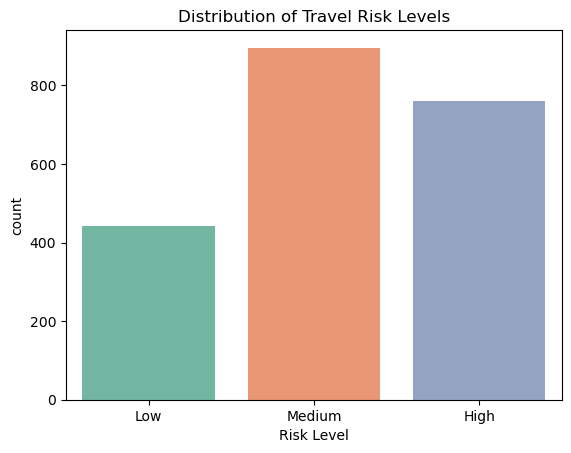

In [10]:
sns.countplot(data=df, x='Risk Level', palette='Set2')
plt.title('Distribution of Travel Risk Levels')
plt.show()

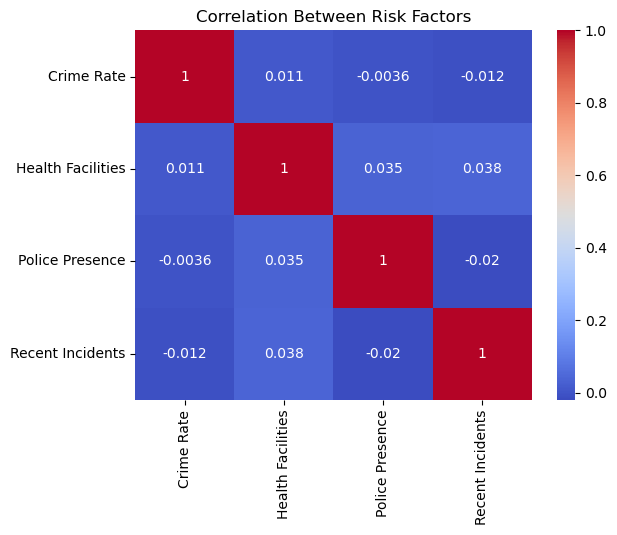

In [11]:
numerical_cols = ["Crime Rate", "Health Facilities", "Police Presence", "Recent Incidents"]

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Risk Factors")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8744\2822793931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk Level', y=col, palette="Set3")


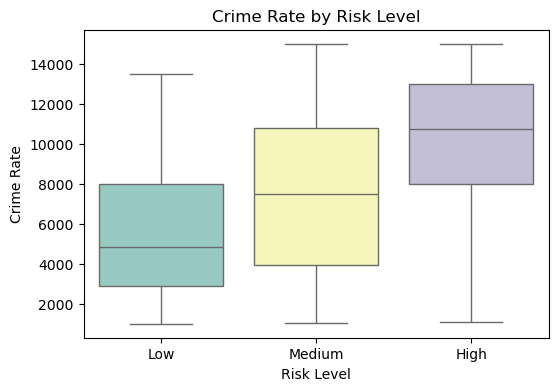

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8744\2822793931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk Level', y=col, palette="Set3")


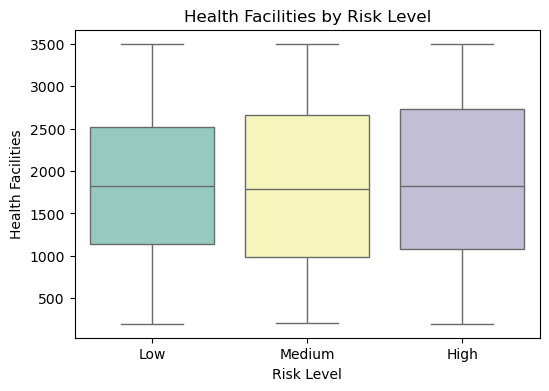

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8744\2822793931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk Level', y=col, palette="Set3")


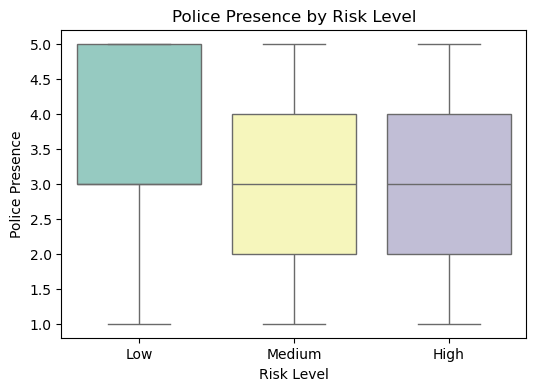

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8744\2822793931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk Level', y=col, palette="Set3")


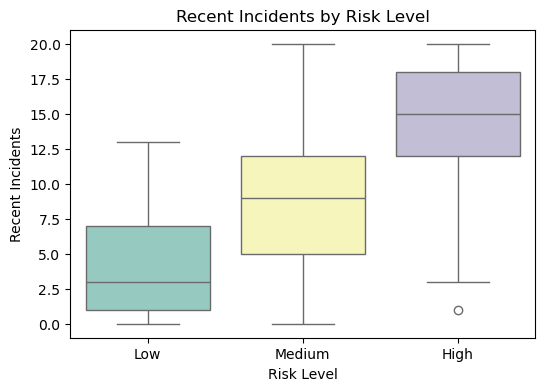

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Risk Level', y=col, palette="Set3")
    plt.title(f'{col} by Risk Level')
    plt.show()

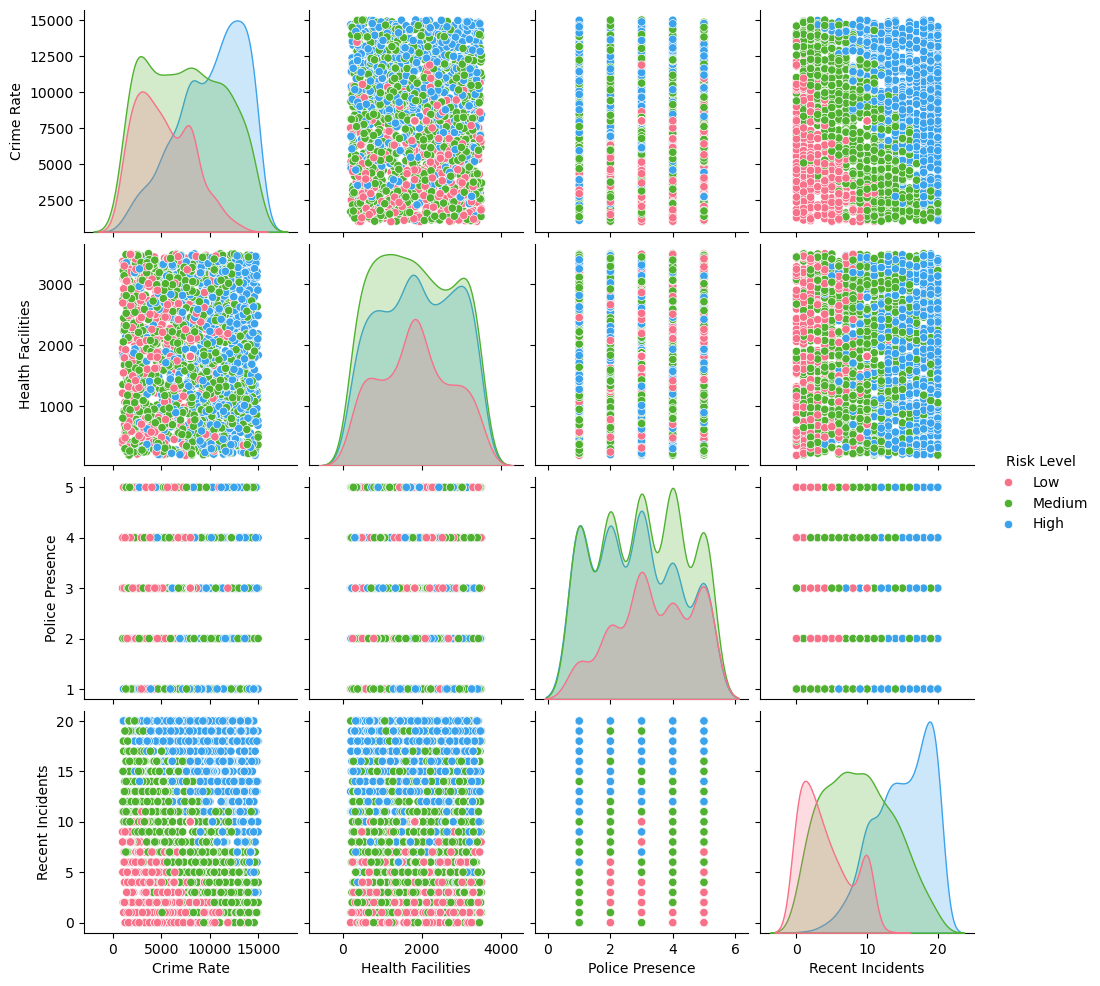

In [13]:
sns.pairplot(df[numerical_cols + ['Risk Level']], hue='Risk Level', palette='husl')

In [14]:
df['Risk Level'] = df['Risk Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [15]:
X = df[['Crime Rate', 'Health Facilities', 'Police Presence', 'Recent Incidents']]
y = df['Risk Level']

In [16]:
# Split for safety (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


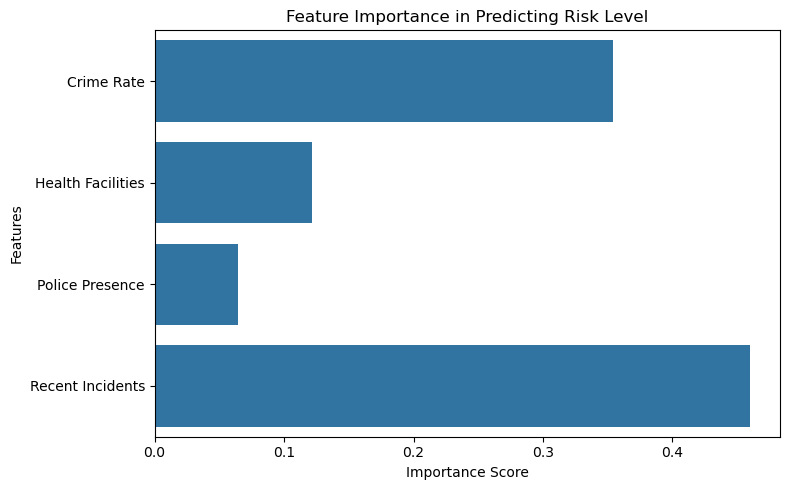

In [17]:
# Extract and plot
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Risk Level')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [18]:
# Encode Risk Level (target)
le = LabelEncoder()
df['Risk Level'] = le.fit_transform(df['Risk Level'])

# Define features and target
features = ['Crime Rate', 'Health Facilities', 'Police Presence', 'Recent Incidents']
X = df[features]
y = df['Risk Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, target_names=le.classes_, output_dict=True)
    
    results[name] = {
        "Accuracy": acc,
        "Model": model,
        "Report": report
    }
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=["Low", "Medium", "High"]))



Model: Random Forest
Accuracy: 0.8262
              precision    recall  f1-score   support

         Low       0.80      0.81      0.80        88
      Medium       0.80      0.84      0.82       180
        High       0.88      0.82      0.85       152

    accuracy                           0.83       420
   macro avg       0.83      0.82      0.82       420
weighted avg       0.83      0.83      0.83       420



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 0.8333
              precision    recall  f1-score   support

         Low       0.95      0.61      0.74        88
      Medium       0.75      0.91      0.82       180
        High       0.91      0.87      0.89       152

    accuracy                           0.83       420
   macro avg       0.87      0.80      0.82       420
weighted avg       0.85      0.83      0.83       420

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 4
[LightGBM] [Info] Start training from score -1.554431
[LightGBM] [Info] Start training from score -0.852869
[LightGBM] [Info] Start training fro

In [20]:
# Pick best by accuracy
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = results[best_model_name]['Model']

# Save the best model and label encoder
joblib.dump(best_model, 'risk_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print(f"\n✅ Best model saved: {best_model_name}")


✅ Best model saved: Logistic Regression


In [30]:
# Saving the cleaned dataset
df1 = df1.drop(["Hospital Access", "Road Condition"], axis =1)
df1.to_csv('travel_risk_clean.csv', index=False)
print("✅ Cleaned dataset saved.")

✅ Cleaned dataset saved.


In [31]:
df1.head()

,State,Crime Rate,Health Facilities,Police Presence,Recent Incidents,Risk Level
0,Kebbi,2824.0,302.0,3.0,4.0,Low
1,Lagos,2679.0,2971.0,5.0,13.0,Medium
2,Adamawa,1488.0,583.0,2.0,19.0,Medium
3,Abia,10195.0,1014.0,5.0,14.0,High
4,Kano,5557.0,226.0,2.0,8.0,Medium
